# Support Vector Machines - Example Project

Support Vector Machines (SVM) are a method that uses points in a transformed problem space that best separate classes into two groups. Classification for multiple classes is then supported by a one-vs-all method (just like we previously did for Logistic Regression for Multi Class Classification).

This lecture section will be broken up by the following sections:

<br>
Part 1: Introduction to Support Vector Machines
<br>
Part 2: SVM General Explanation
<br>
Part 3: Computing the Hyperplane
<br>
Part 4: Additional Math Resources
<br>
Part 5: SVM with Sci Kit Learn
<br>
Part 6: Additional Resources
<br>

## Part 1: Introduction to Support Vector Machines¶ 

Formal Explanation:

In machine learning, support vector machines (SVMs) are supervised learning models with associated learning algorithms that analyze data and recognize patterns, used for classification and regression analysis. Given a set of training examples, each marked for belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples into one category or the other, making it a non-probabilistic binary linear classifier. An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall on.

The advantages of support vector machines are:

Effective in high dimensional spaces.
Still effective in cases where number of dimensions is greater than the number of samples.
Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.
The disadvantages of support vector machines include:

If the number of features is much greater than the number of samples, the method is likely to give poor performances.
SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

Let's go ahead and break down the main idea of SVMs!

## Part 2: SVM General Explanation

We'll start by imagining a situation in which we want to seperate a training set with two classes. We have two classes in our set, blue and red. We plot them out in the feature space and we try to place a green line that seperates both classes.

We have multiple ways of drawing this line (which we will call a hyperplane) that can seperate the classes completely. So which is the optimal line?

We decide that the optimal hyperplane that seperates these two classes is the one with the maximum margin between the two classes.

So how do we actually mathematically compute that optimal hyperplane? I'll explain with a very brief overview below in Part 3, but I highly suggest you check out the full explanation on <a href="I'll explain with a very brief overview below in Part 3, but I highly suggest you check out the full explanation on Wikipedia or in the lecture videos following Part 3." target="_blank">Wikipedia</a> or in the lecture videos following Part 3.

## Part 3: Computing The Hyperplane

Let's go ahead and start by defining the Hyperplane in this case with the equation of a line, where Beta tranposed is the known weight vector of the features we've seen before and Beta nought is the bias.

f(x)=β0+βTx

There are an infinite number of ways we could scale the weight vector and the bias, but remember we want to maximize the margin between the two classes. So we realize through some math (explained in detail the videos below) can set this as:

|β0+βTx|=1

where x symbolizes the training examples closest to the hyperplane. In general, the training examples that are closest to the hyperplane are called support vectors. These support vectors are filled in with color in the image above. This representation is known as the canonical hyperplane.

From geometry we know that the distance betweeen a point x and the hyperplane (Beta,Beta0)is: distance=|β0+βTx|||β||.

In particular, for the canonical hyperplane, the numerator is equal to one and the distance to the support vectors is
distance support vectors=|β0+βTx|||β||=1||β||

Recall that the margin introduced in the previous section, here denoted as M, is twice the distance to the closest examples:

M=2||β||

Finally, the problem of maximizing M is equivalent to the problem of minimizing a function L(Beta) subject to some constraints. The constraints model the requirement for the hyperplane to classify correctly all the training examples xi.

Formally,

minβ,β0L(β)=12||β||2 subject to yi(βTxi+β0)≥1 ∀i

where yi represents each of the labels of the training examples.

This is a problem of Lagrangian optimization that can be solved using <a href="https://en.wikipedia.org/wiki/Lagrange_multiplier" target="_blank">Lagrange multipliers</a> to obtain the weight vector Beta and the bias Beta0 of the optimal hyperplane.

If we want to do non-linear classification we can employ the <a href="https://en.wikipedia.org/wiki/Kernel_method" target="_blank">kernel trick</a>. Using the kernel trick we can "slice" the feature space with a Hyperplane. For a quick illustraion of what this looks like, check out both the image and the video below!


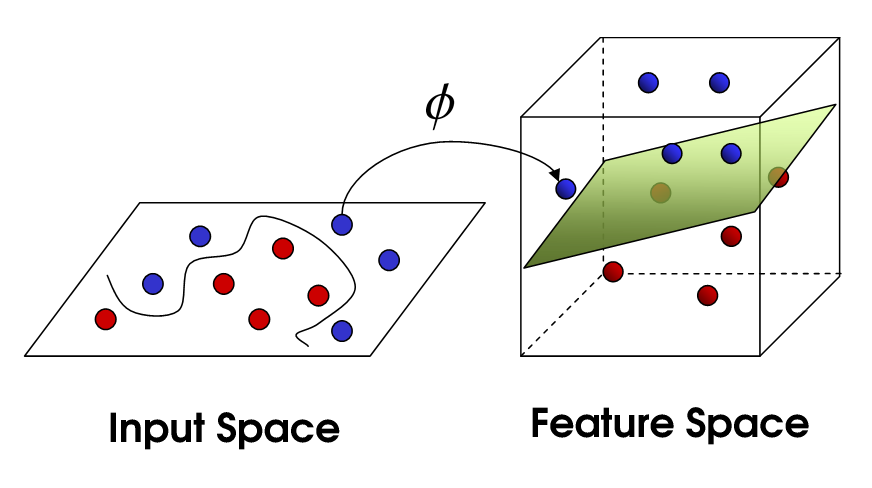

In [5]:
# Kernel Trick for the Feature Space
url='http://i.imgur.com/WuxyO.png'
Image(url)

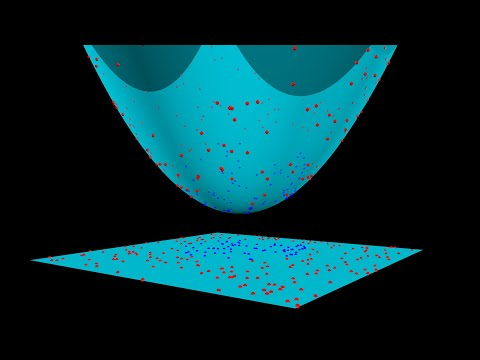

In [6]:
# Kernel Trick Visualization
from IPython.display import YouTubeVideo
YouTubeVideo('3liCbRZPrZA')

## Part 4: Additional Math Resources

Below are video links to free resources for a deeper dive into the mathematics of Support Vector Machines. First a lecture by Andrew Ng and then a lecture from MIT Open CourseWare

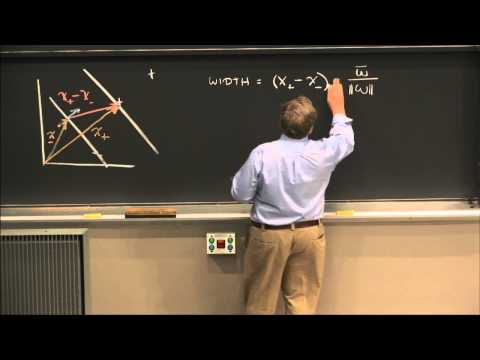

In [8]:
# MIT Lecture
YouTubeVideo('_PwhiWxHK8o')

## Part 5: SVM with Sci Kit Learn 

Now we are ready to jump into some Python code and Sci Kit Learn, we'll start with some basic imports and we will import Sci Kit Learn along the way while we use it.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from sklearn import datasets


In [11]:
iris = datasets.load_iris()

X = iris.data

Y = iris.target

In [12]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [13]:
from sklearn.svm import SVC

In [14]:
model = SVC()

In [16]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4,random_state=3)

In [36]:
model.fit(X_train,Y_train)

SVC()

In [37]:
from sklearn import metrics

In [38]:
predicted = model.predict(X_test)

expected = Y_test

In [39]:
print(metrics.accuracy_score(expected,predicted))

0.95


In [40]:
from sklearn import svm

In [41]:
X = iris.data[:,:2]

Y = iris.target

In [42]:
C = 1.0

In [43]:
svc = svm.SVC(kernel='linear',C=C).fit(X,Y)

In [44]:
rbf_svc = svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X,Y)

In [45]:
poly_svc = svm.SVC(kernel='poly',degree=3,C=C).fit(X,Y)

In [46]:
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [47]:
h = 0.02

x_min = X[:,0].min() -1
x_max = X[:,0].max() +1

In [48]:
y_min = X[:,1].min() -1
y_max = X[:,1].max() +1

In [49]:
xx, yy = np.meshgrid(np.arange(x_min,x_max),np.arange(y_min,y_max,h))

In [50]:
titles = ['SVC with linear kernel',
         'LinearSVC (linear kernel)',
         'SVC with RBF kernel',
         'SVC with polynomial (degree 3) kernel']

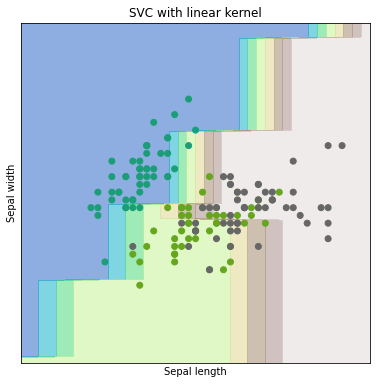

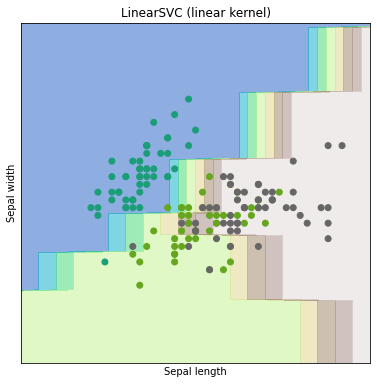

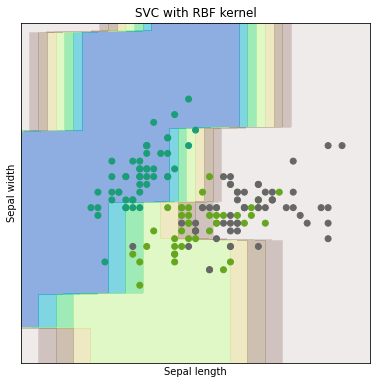

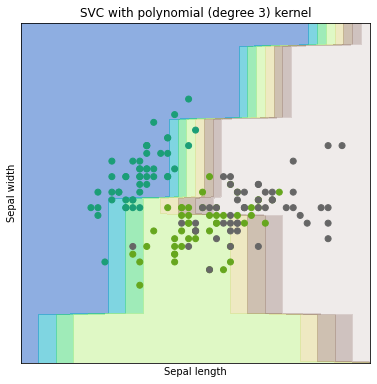

In [52]:
for i,clf in enumerate((svc,lin_svc,rbf_svc,poly_svc)):
    
    plt.figure(figsize=(15,15))
    
    plt.subplot(2,2,i+1)
    
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5)
    
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Dark2)
    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.ylim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    